In [12]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist as mnist # type: ignore
from scipy.signal import convolve2d
import time
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical

In [13]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [14]:
kernels = {
    'Edge Detection': np.array([
        [-1, -1, -1],
        [-1, -8, -1],
        [-1, -1, -1]]),

    'Vertical Lines': np.array([
        [-1, 2, -1],
        [-1, 2, -1],
        [-1, 2, -1]]),
    'Blur': 1/9 * np.ones((3, 3))
}

In [15]:
def apply_convolution(image, kernel):
    return convolve2d(image, kernel, mode='same')

In [16]:

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7228 - loss: 0.7713 - val_accuracy: 0.8634 - val_loss: 0.3844
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8692 - loss: 0.3593 - val_accuracy: 0.8823 - val_loss: 0.3269
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8942 - loss: 0.2911 - val_accuracy: 0.8916 - val_loss: 0.3126
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9044 - loss: 0.2592 - val_accuracy: 0.8911 - val_loss: 0.2921
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9137 - loss: 0.2348 - val_accuracy: 0.8919 - val_loss: 0.2943
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9189 - loss: 0.2168 - val_accuracy: 0.9027 - val_loss: 0.2652
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9268 - loss: 0.1977 - val_accuracy: 0.9012 - val_loss: 0.2682
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9331 - loss: 0.1804 - val_accuracy: 0.

In [17]:
def show_feature_maps(digit_idx=None):
    if digit_idx is None:
        digit_idx = np.random.randint(0, len(X_train))

    image = X_train[digit_idx]
    digit = y_train[digit_idx]


    image = np.squeeze(image)

    fig, axes = plt.subplots(2, 4, figsize=(15, 8))
    fig.suptitle(f'CNN Feature Detection - MNIST Digit: {digit}', fontsize=16)

    axes[0, 0].imshow(image, cmap='gray')
    axes[0, 0].set_title('Original Image')
    axes[0, 0].axis('off')

    for idx, (name, kernel) in enumerate(kernels.items(), 1):
        axes[0, idx].imshow(kernel, cmap='coolwarm')
        axes[0, idx].set_title(f'Kernel: {name}')
        axes[0, idx].axis('off')

        result = apply_convolution(image, kernel)
        result = (result - result.min()) / (result.max() - result.min())

        axes[1, idx].imshow(result, cmap='gray')
        axes[1, idx].set_title(f'Feature Map')
        axes[1, idx].axis('off')

    axes[1, 0].axis('off')

    plt.tight_layout()
    plt.show()

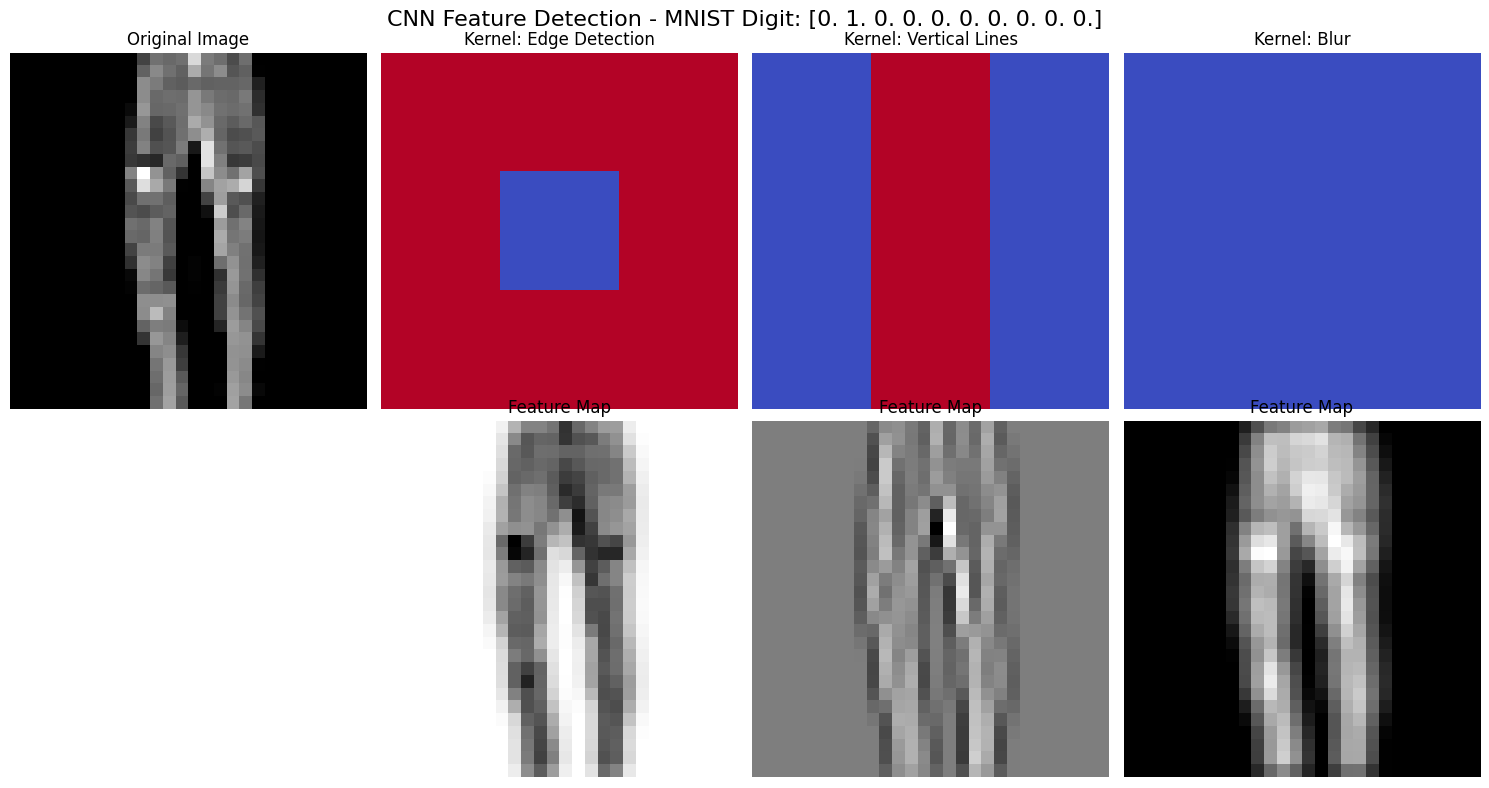

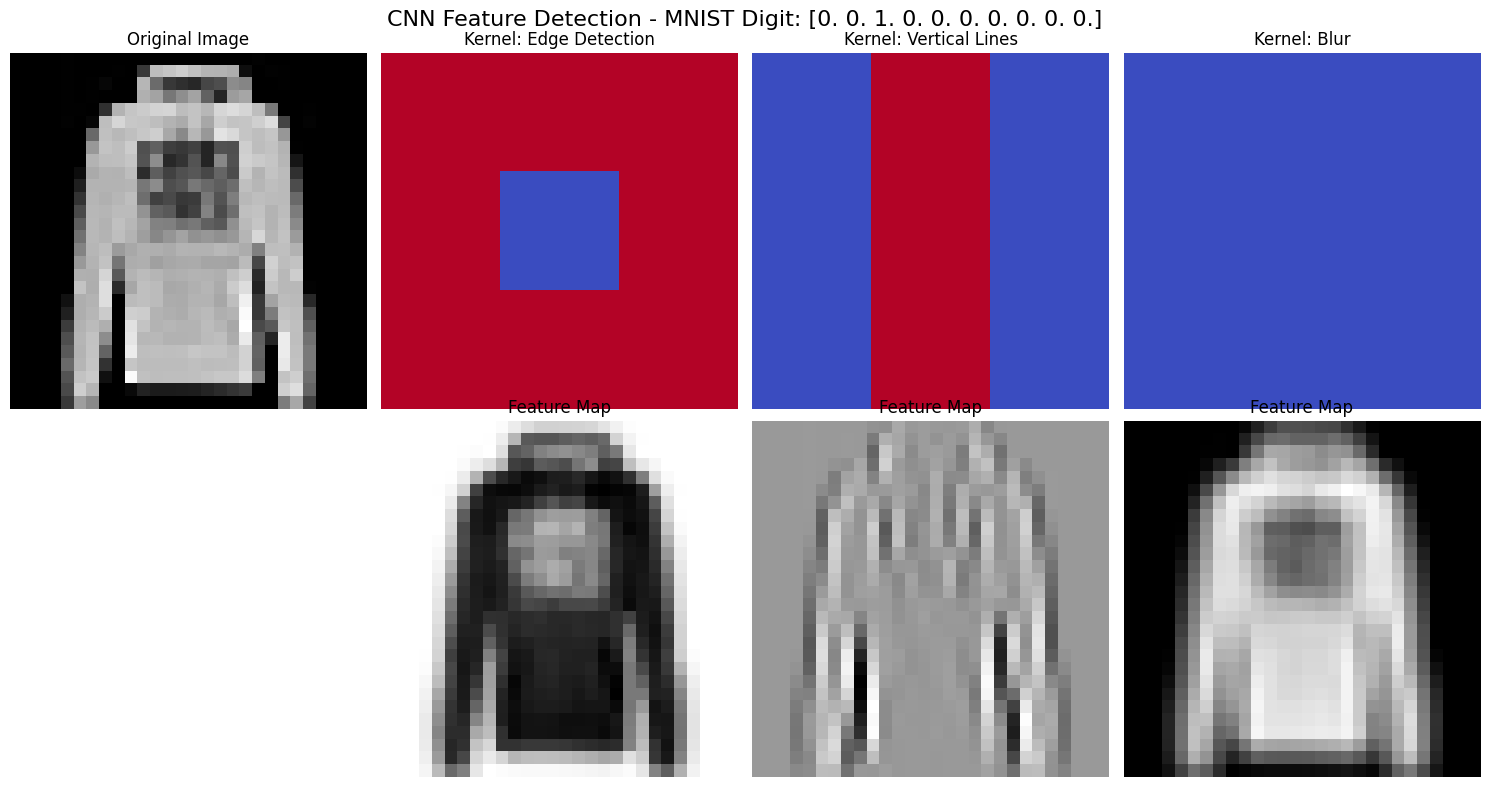

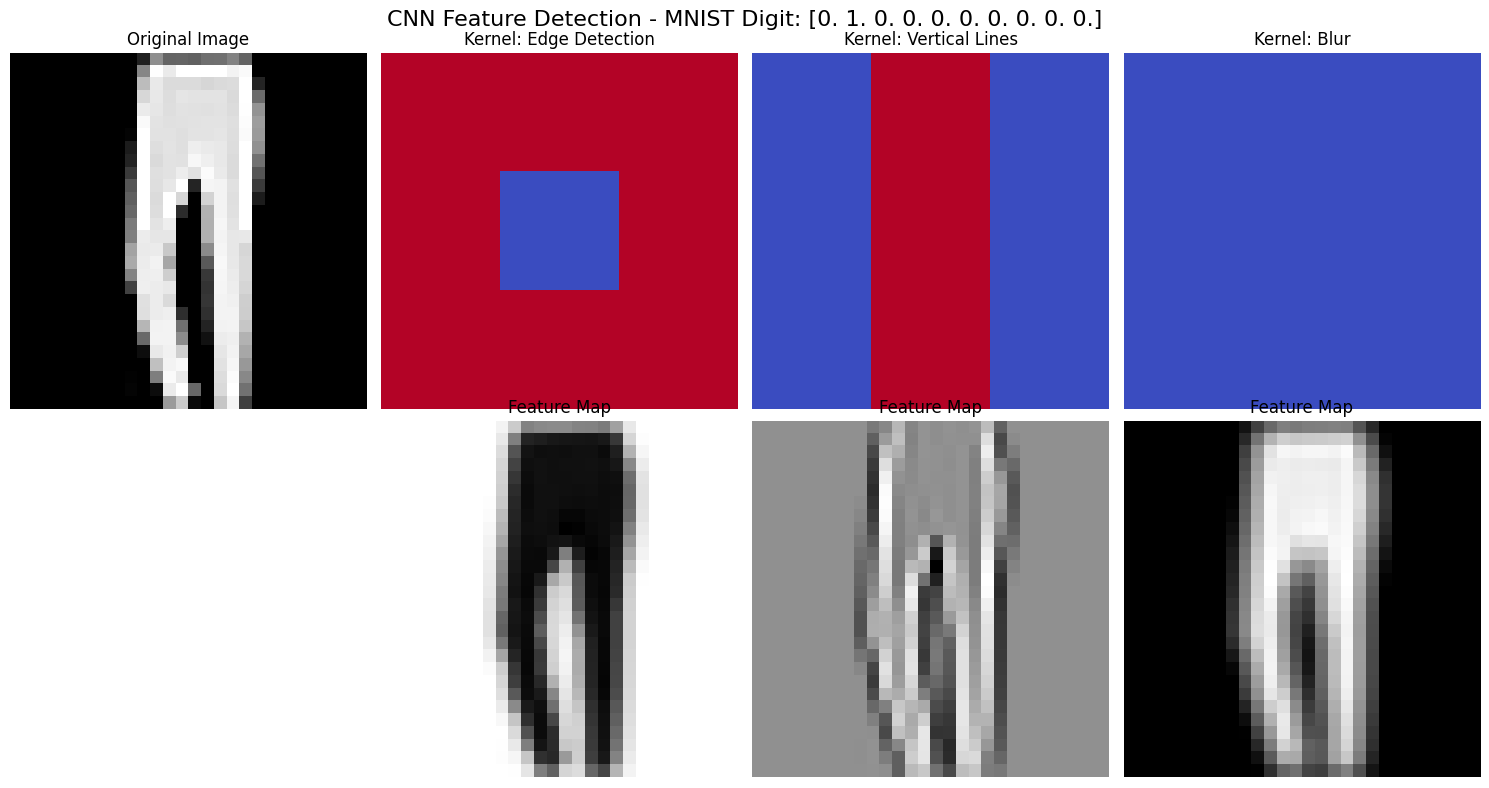

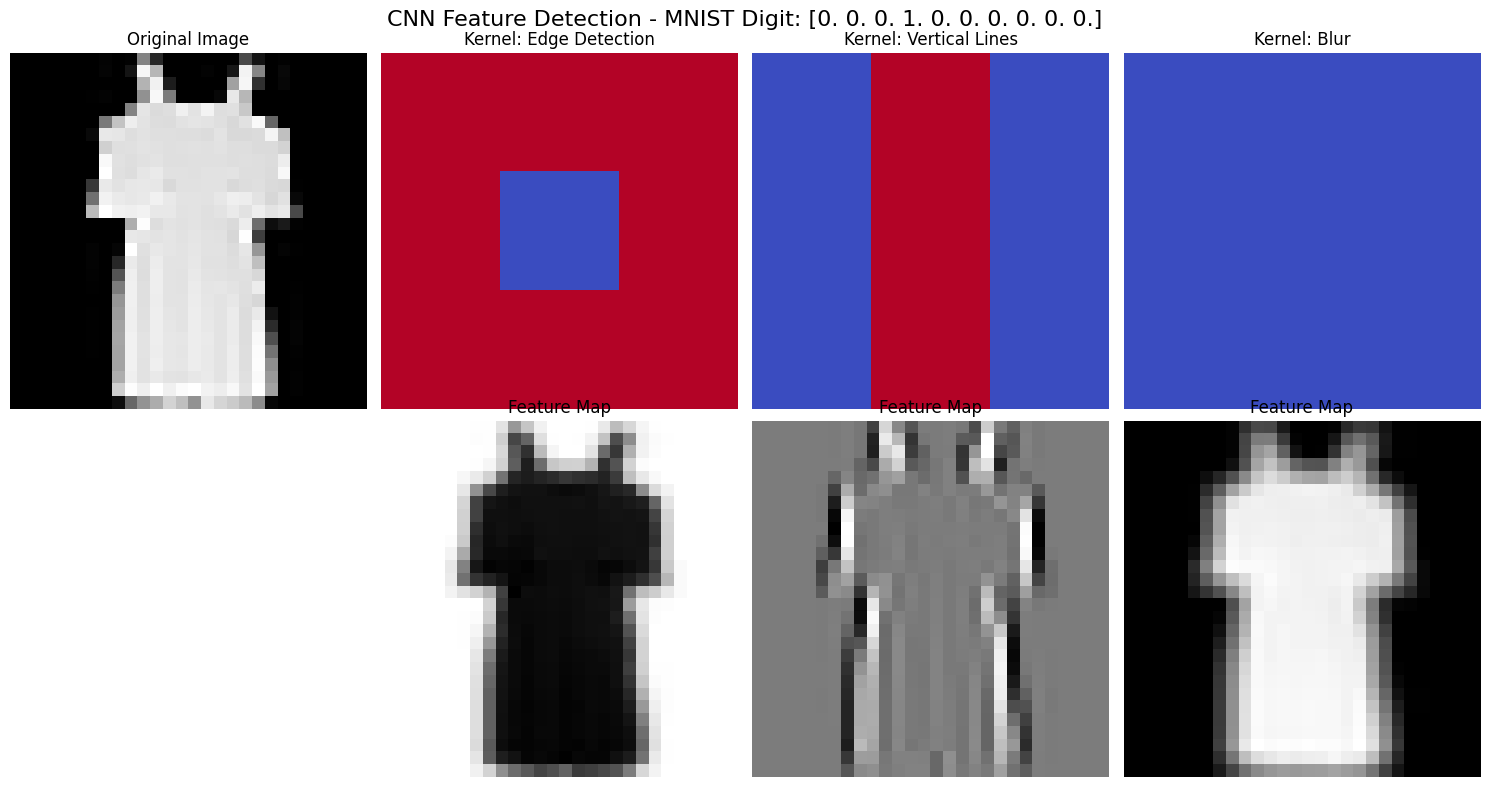

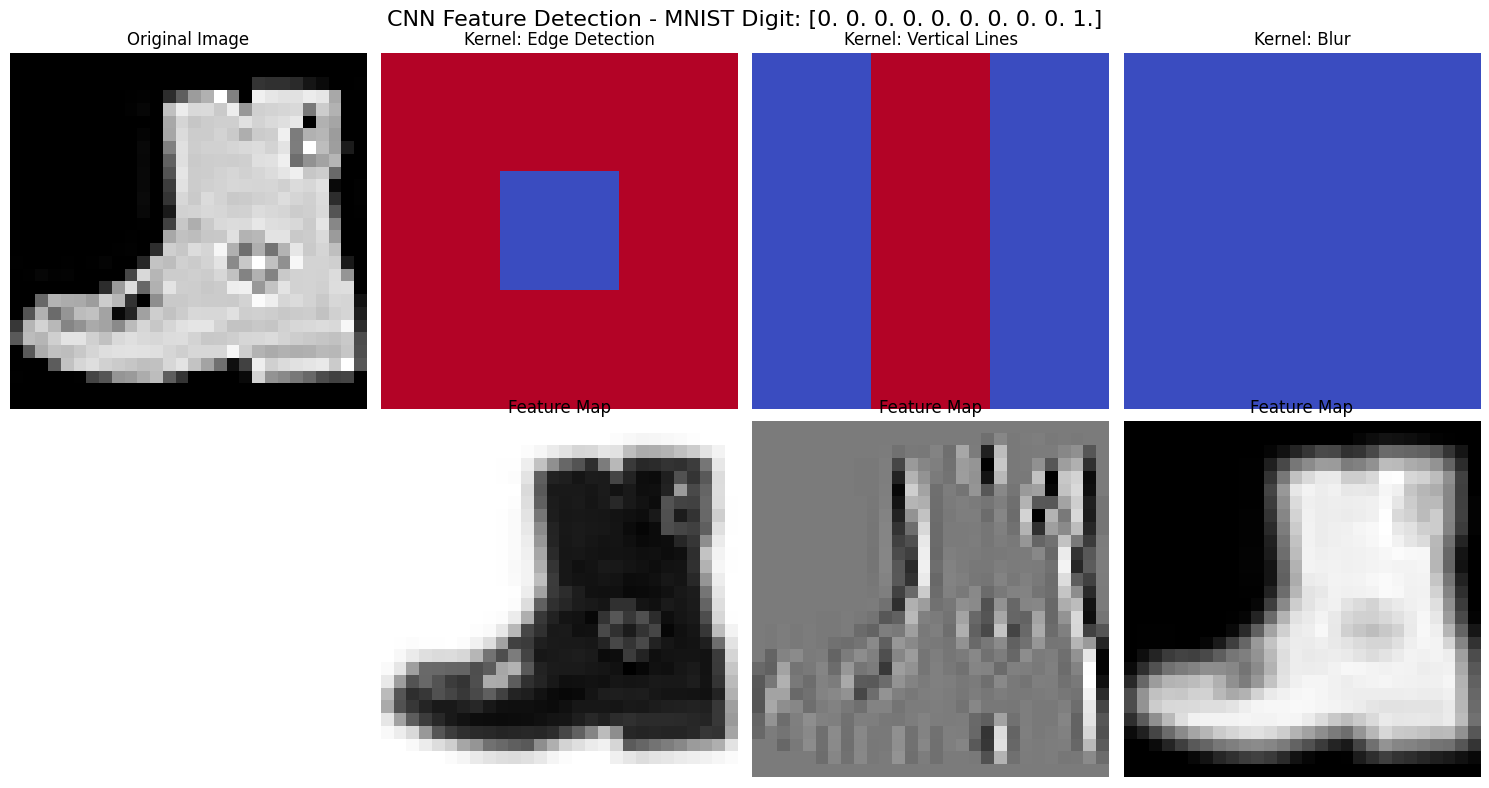

In [18]:
num_examples = 5
while num_examples > 0:
  show_feature_maps()
  time.sleep(2)
  num_examples -= 1